In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("dataset/ifood_df.csv")

In [4]:
df.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
print("Có tổng cộng "+ str(df.shape[0]) +" dòng và "+ str(df.shape[1]) +" cột từ bộ dữ liệu.")

Có tổng cộng 2205 dòng và 39 cột từ bộ dữ liệu.


In [6]:
df.isna().sum().sort_values(ascending=False)

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [7]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [8]:
spending_cols = [
    "MntWines",
    "MntMeatProducts",
    "MntFruits",
    "MntSweetProducts",
    "MntGoldProds"
]
behavior_cols = [
    "NumWebPurchases",
    "NumStorePurchases",
    "NumCatalogPurchases",
    "NumDealsPurchases",
    "NumWebVisitsMonth",
    "Recency"
]

In [9]:
df["TotalSpending"] = df[spending_cols].sum(axis=1)
df["TotalPurchases"] = (
    df["NumWebPurchases"]
    + df["NumStorePurchases"]
    + df["NumCatalogPurchases"]
)

In [10]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalSpending,TotalPurchases
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,569.065306,12.569615
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,567.892788,7.180350
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,5.000000,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,63.000000,6.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,369.000000,12.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,970.000000,18.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,2431.000000,32.000000


Thu nhập TB: 51622, Đa phần KH trong khoảng 35196 - 68281
Lượng tiền chi TB: 569
Số lần mua TB ~ 13

Liệu thu nhập càng cao là càng mua nhiều lần, chi nhiều tiền ?

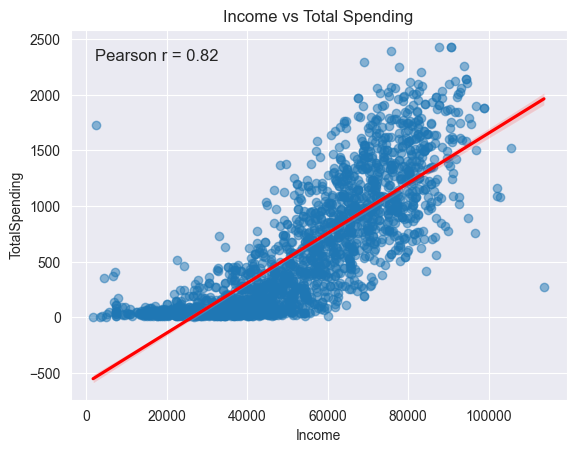

In [11]:
from scipy.stats import pearsonr

# Tính hệ số tương quan
r, p = pearsonr(df["Income"], df["TotalSpending"])

plt.figure()
sns.regplot(
    data=df,
    x="Income",
    y="TotalSpending",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)

plt.xlabel("Income")
plt.ylabel("TotalSpending")
plt.title("Income vs Total Spending")

# In hệ số tương quan lên biểu đồ
plt.text(
    0.05, 0.95,
    f"Pearson r = {r:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top"
)

plt.show()

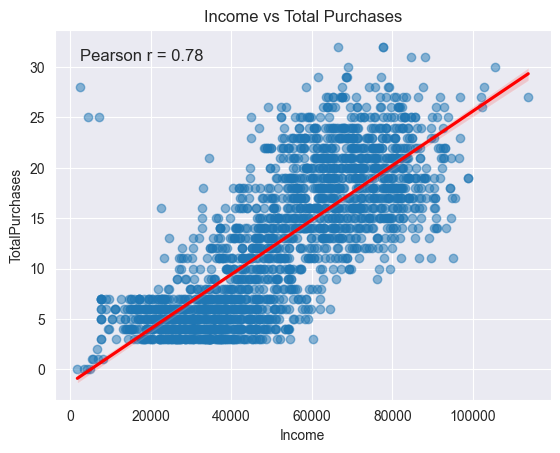

In [12]:
r, p = pearsonr(df["Income"], df["TotalPurchases"])

plt.figure()
sns.regplot(
    data=df,
    x="Income",
    y="TotalPurchases",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)

plt.xlabel("Income")
plt.ylabel("TotalPurchases")
plt.title("Income vs Total Purchases")

plt.text(
    0.05, 0.95,
    f"Pearson r = {r:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top"
)

plt.show()

Điều này cho thấy Thu nhập có tương quan mạnh với Tổng số tiền chi tiêu và Tổng số lần mua.
Khách có thu nhập cao sẽ mua nhiều lần và chi nhiều tiền hơn

Liệu Mua nhiều lần với chi nhiều tiền có tương quan ?

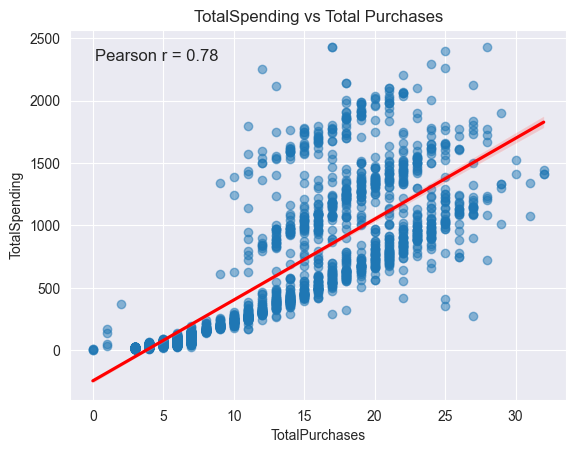

In [13]:
r, p = pearsonr(df["Income"], df["TotalPurchases"])

plt.figure()
sns.regplot(
    data=df,
    x="TotalPurchases",
    y="TotalSpending",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)

plt.xlabel("TotalPurchases")
plt.ylabel("TotalSpending")
plt.title("TotalSpending vs Total Purchases")

plt.text(
    0.05, 0.95,
    f"Pearson r = {r:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top"
)

plt.show()

Mua nhiều lần cũng có nghĩa là khách chi nhiều tiền hơn

Khách mua qua đâu là nhiều nhất

In [14]:
channels = {
    "Web": df["NumWebPurchases"].sum(),
    "Catalog": df["NumCatalogPurchases"].sum(),
    "Store": df["NumStorePurchases"].sum()
}

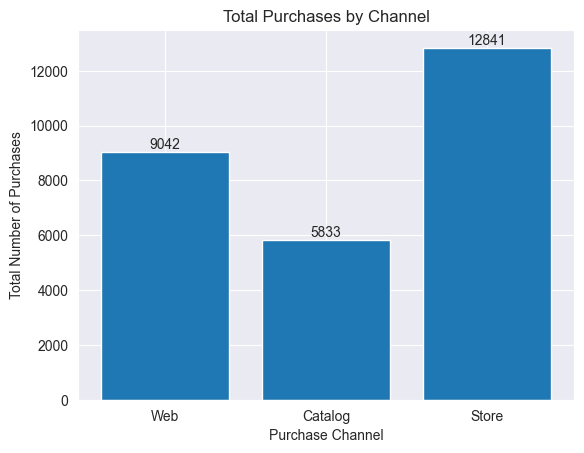

In [15]:
plt.figure()
bars = plt.bar(channels.keys(), channels.values())

plt.xlabel("Purchase Channel")
plt.ylabel("Total Number of Purchases")
plt.title("Total Purchases by Channel")

# Hiện số lên đỉnh mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )

plt.show()

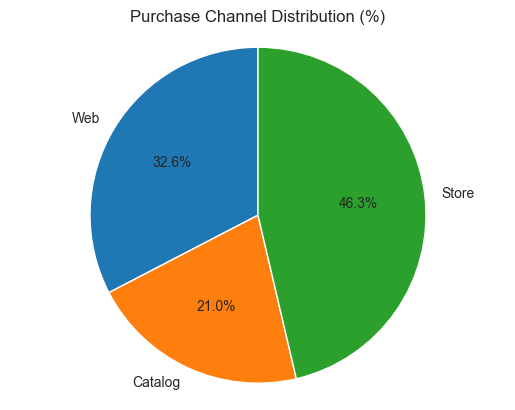

In [16]:
plt.figure()
plt.pie(
    channels.values(),
    labels=channels.keys(),
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Purchase Channel Distribution (%)")
plt.axis("equal")  # hình tròn đẹp hơn

plt.show()


Phần lớn khách hàng mua trực tiếp tại cửa hàng (46,3%), tiếp đến là mua qua website (32,6%), và cuối cùng là qua Catalog (21%)

Tỉ lệ KH khiếu nại

In [17]:
total_complain = (df["Complain"] == 1).sum()
ratio_complain = total_complain / len(df)
print(f"Tỷ lệ khách hàng có khiếu nại: {ratio_complain:.2%}")

Tỷ lệ khách hàng có khiếu nại: 0.91%


Phân bổ số ngày kể từ lần mua hàng cuối

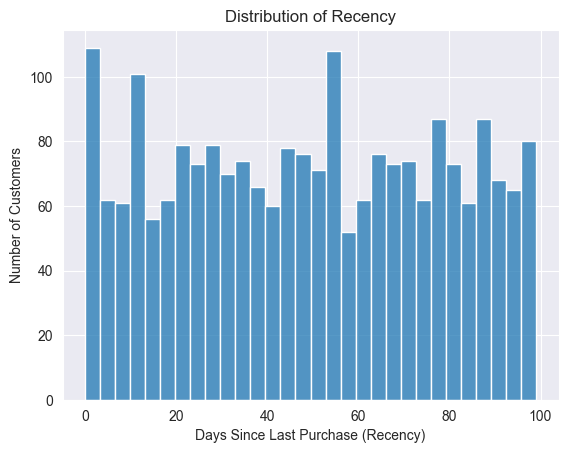

In [18]:
plt.figure()
sns.histplot(df["Recency"], bins=30)

plt.xlabel("Days Since Last Purchase (Recency)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Recency")

plt.show()

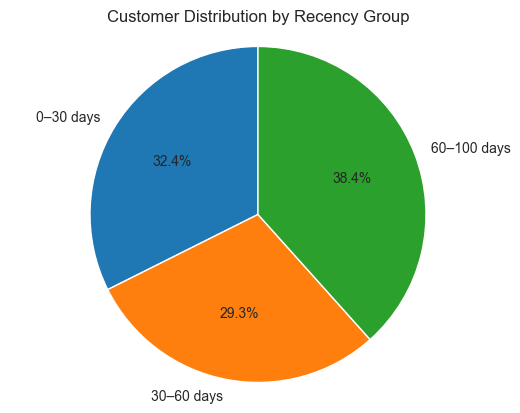

In [19]:
bins = [0, 30, 60, 100]
labels = ["0–30 days", "30–60 days", "60–100 days"]

df["Recency_Group"] = pd.cut(
    df["Recency"],
    bins=bins,
    labels=labels,
    include_lowest=True
)
recency_counts = df["Recency_Group"].value_counts().sort_index()
plt.figure()
plt.pie(
    recency_counts.values,
    labels=recency_counts.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Customer Distribution by Recency Group")
plt.axis("equal")

plt.show()


Lớn nhất là khoảng từ 60 - 100 ngày, kế đến là 0 - 30 ngày. Tỷ lệ ở các nhóm không quá chênh lệch. Tuy nhiên tỷ lệ khách hàng chưa quay lại mua trên 1 tháng kể từ lần mua cuối là 29,3 + 38,4 = 67,7 % khá cao, cần có chiến lược khuyến khích khách quay lại mua trong vòng 1 tháng

Trình độ học vấn

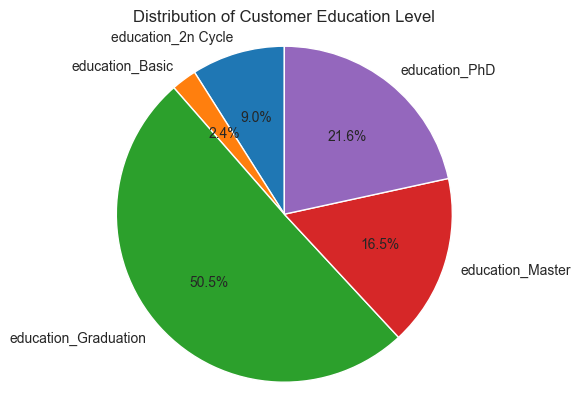

In [20]:
education_cols = [
    "education_2n Cycle",
    "education_Basic",
    "education_Graduation",
    "education_Master",
    "education_PhD"
]

edu_counts = df[education_cols].sum()
plt.figure()
plt.pie(
    edu_counts.values,
    labels=edu_counts.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Distribution of Customer Education Level")
plt.axis("equal")

plt.show()

Hơn 50% KH có trình độ Đại Học, Kế đến là tiến sĩ (21,6%) và Thạc sĩ (16,5%).                                                            Hơn 88% khách hàng có trình độ từ Đại học trở lên (Graduation + Master + PhD). Điều này cho thấy khách hàng là nhóm có tri thức, có thể khó tính hơn và ưu tiên chất lượng sản phẩm.

Phân bổ tuổi

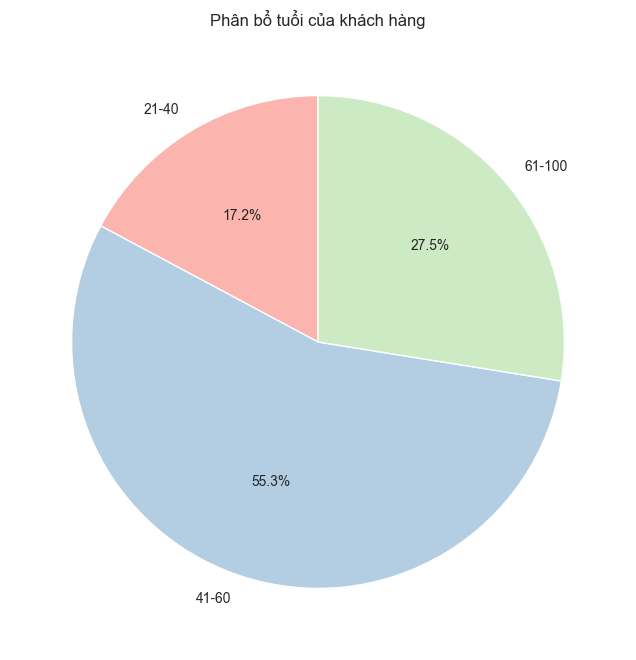

In [21]:
bins = [20, 40, 60, 100]  # bạn có thể tùy chỉnh
labels = ['21-40', '41-60', '61-100']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Đếm số lượng từng nhóm
age_counts = df['AgeGroup'].value_counts().sort_index()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Phân bổ tuổi của khách hàng')
plt.show()

Đa phần KH thuộc độ tuổi trung niên, lão với 55,3% KH có độ tuổi từ 41-60, 27,5% là độ tuổi 61-100. Còn lại số ít KH có độ tuổi từ 21-40. Nhóm tuổi 41-60 chiếm đa số (55.3%). Đây là độ tuổi vàng về tài chính, thường là những người đã có sự nghiệp ổn định và sức mua cao nhất. Nhóm 61-100 tuổi (27.5%) cũng chiếm tỉ trọng khá lớn, cho thấy sản phẩm/dịch vụ cũng thu hút được người cao tuổi hoặc những người đã nghỉ hưu.

Tỷ lệ phản hồi với các chiến dịch, chiến dịch nào có tỷ lệ phản hồi cao

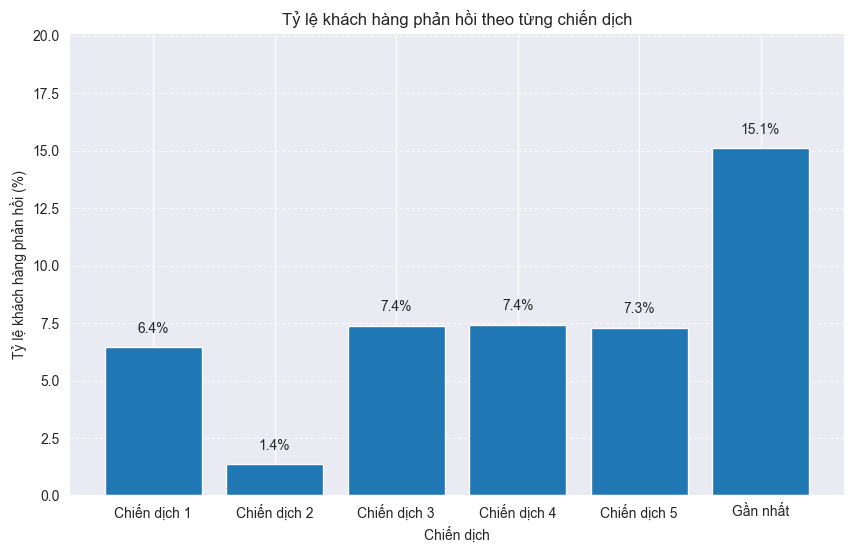

In [22]:
# Các cột chiến dịch
campaign_cols = [
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Response'
]

# Tên hiển thị cho biểu đồ
campaign_labels = [
    'Chiến dịch 1',
    'Chiến dịch 2',
    'Chiến dịch 3',
    'Chiến dịch 4',
    'Chiến dịch 5',
    'Gần nhất'
]

# Tính % khách hàng phản hồi
campaign_response_rate = df[campaign_cols].mean() * 100

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
bars = plt.bar(campaign_labels, campaign_response_rate)

plt.ylabel('Tỷ lệ khách hàng phản hồi (%)')
plt.xlabel('Chiến dịch')
plt.title('Tỷ lệ khách hàng phản hồi theo từng chiến dịch')
plt.ylim(0, campaign_response_rate.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiện số % trên đỉnh cột
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

Chiến dịch 2 có tỷ lệ phản hồi thấp nhất , các chiến dịch 1,3,4 có tỷ lệ phản hồi được cải thiện đáng kể. Đặc biệt chiến dịch gần nhất có tỷ lệ phản hồi tăng đột biến.

In [23]:
df["TotalSpending"] = df[["MntWines","MntMeatProducts","MntFruits","MntSweetProducts","MntGoldProds"]].sum(axis=1)
df["TotalPurchases"] = df[["NumCatalogPurchases", "NumStorePurchases", "NumWebPurchases"]].sum(axis=1)

In [24]:
df.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalSpending,TotalPurchases,Recency_Group,AgeGroup
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,1529,1441,0,1445,22,30–60 days,61-100
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,21,15,0,25,4,30–60 days,61-100
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,734,692,0,665,20,0–30 days,41-60
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,48,43,0,43,6,0–30 days,21-40
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,407,392,0,376,14,60–100 days,21-40


In [25]:
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df['ResponseRate'] = df[campaign_cols].sum(axis=1) / len(campaign_cols)
df['ResponseRate'] = df['ResponseRate'] * 100
df["ResponseRate"].head(5)

0    16.666667
1     0.000000
2     0.000000
3     0.000000
4     0.000000
Name: ResponseRate, dtype: float64

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

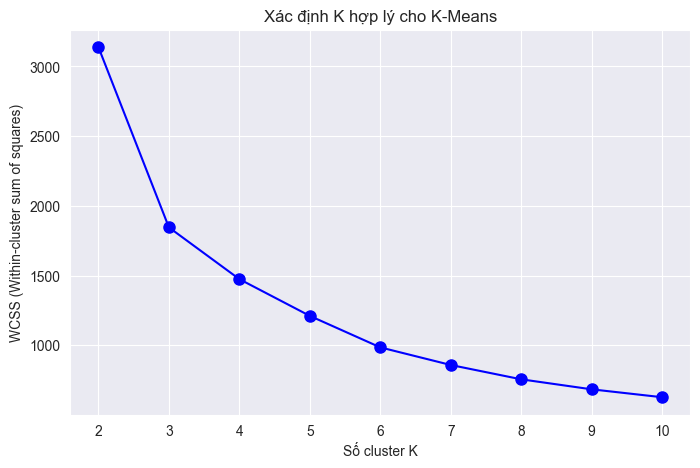

In [27]:
features = ['TotalSpending', 'TotalPurchases', 'ResponseRate']

X = df[features]

wcss = []
K_range = range(2, 11)  # thử K từ 2 đến 10

for k in K_range:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=k, random_state=42,n_init=15))
    ])
    pipeline.fit(X)
    wcss.append(pipeline.named_steps['kmeans'].inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Số cluster K')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.title('Xác định K hợp lý cho K-Means')
plt.show()


Chọn K = 4

In [28]:
best_K = 4

pipeline_final = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=best_K, random_state=42, n_init=15))
])

pipeline_final.fit(X)

df['Cluster'] = pipeline_final.named_steps['kmeans'].labels_
print(df[['TotalSpending','TotalPurchases','ResponseRate','Cluster']].head())

   TotalSpending  TotalPurchases  ResponseRate  Cluster
0           1445              22     16.666667        2
1             25               4      0.000000        3
2            665              20      0.000000        0
3             43               6      0.000000        3
4            376              14      0.000000        0


In [29]:
df["CustomerID"] = range(1, len(df) + 1)

In [30]:
df_cluster = df.copy()
df_cluster['Group'] = 'Cluster ' + df_cluster['Cluster'].astype(str)
df_hr = df[df['Response'] == 1].copy()
df_hr['Group'] = 'HighResponse'
df_for_pbi = pd.concat([df_cluster, df_hr], ignore_index=True)

In [31]:
df_for_pbi.to_csv("dataset/ifood_df.csv", index=False)